In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
data = "spam.csv"

In [3]:
import chardet
with open(data, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
file = pd.read_csv(data,encoding='ISO-8859-1')

In [5]:
file.shape

(5572, 5)

In [6]:
file.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
file.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4' ],inplace = True)

In [9]:
file.rename(columns = {'v1': 'Target', 'v2': 'Email'}, inplace = True)

In [10]:
encoder = LabelEncoder()

In [11]:
file['Target'] = encoder.fit_transform(file['Target'])

In [12]:
file.head()

,Target,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
file.isnull().sum()

Target    0
Email     0
dtype: int64

In [14]:
file.duplicated().sum()

403

In [15]:
file = file.drop_duplicates(keep = 'first')

In [16]:
file.duplicated().sum()

0

In [17]:
file.shape

(5169, 2)

# Exploratory Data Analysis (EDA)

In [18]:
file['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

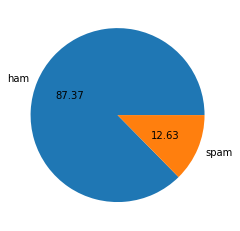

In [19]:
plt.pie(file['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ANUSHA
[nltk_data]     BERA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
file['Email'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Email, Length: 5169, dtype: int64

In [22]:
file['Num_of_char'] = file['Email'].apply(len)

In [23]:
file.head()

,Target,Email,Num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
file['Num_of_word'] = file['Email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
file.head()

,Target,Email,Num_of_char,Num_of_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
file['Num_of_sentence'] = file['Email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
file.head()

,Target,Email,Num_of_char,Num_of_word,Num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
file.describe()

,Target,Num_of_char,Num_of_word,Num_of_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455407,1.961308
std,0.332253,58.236293,13.322448,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


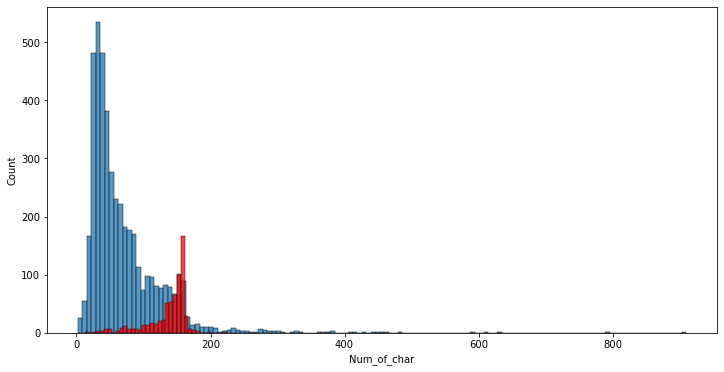

In [29]:
plt.figure(figsize = [12,6])

sns.histplot(file[file['Target'] == 0]['Num_of_char'])
sns.histplot(file[file['Target'] == 1]['Num_of_char'], color = 'red')

plt.show()

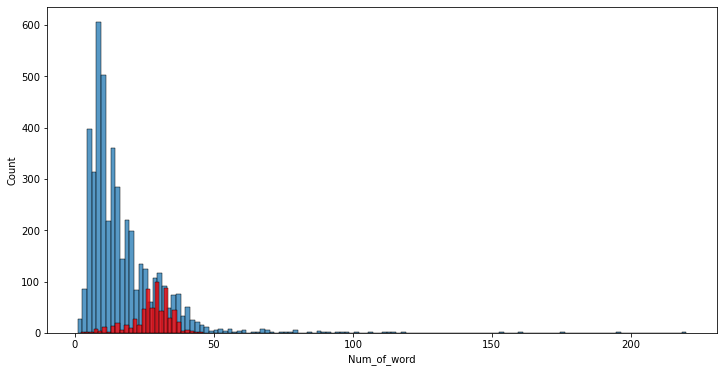

In [30]:
plt.figure(figsize = [12,6])

sns.histplot(file[file['Target'] == 0]['Num_of_word'])
sns.histplot(file[file['Target'] == 1]['Num_of_word'], color = 'red')

plt.show()

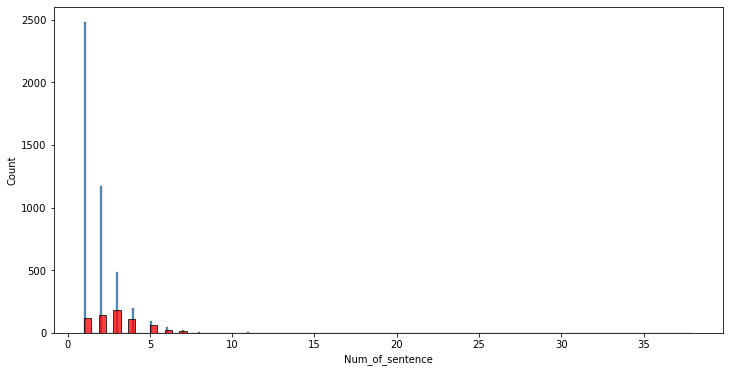

In [31]:
plt.figure(figsize = [12,6])

sns.histplot(file[file['Target'] == 0]['Num_of_sentence'])
sns.histplot(file[file['Target'] == 1]['Num_of_sentence'], color = 'red')

plt.show()

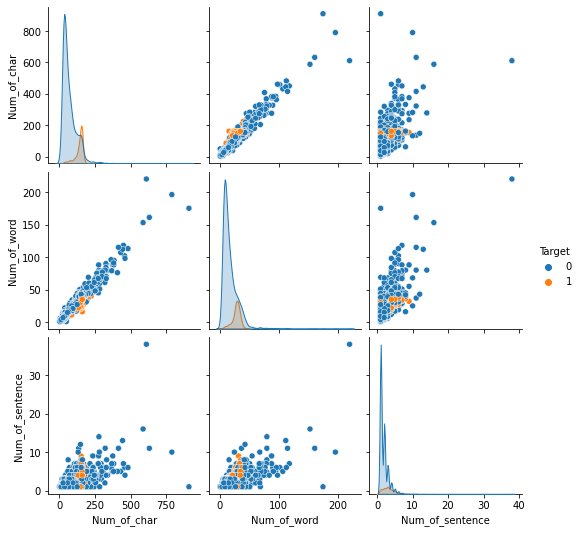

In [32]:
sns.pairplot(file, hue='Target')

<AxesSubplot:>

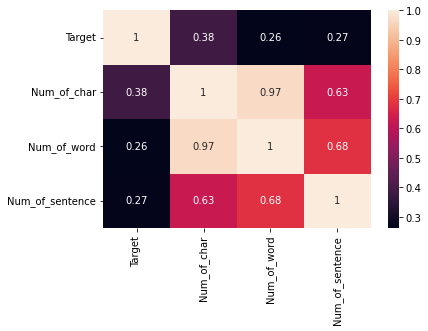

In [33]:
sns.heatmap(file.corr(), annot = True)

# Data Prepocessing

#### Lower case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation
#### stemming

In [34]:
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [36]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')


'love yt lectur machin learn'

In [37]:
file['transformed_email'] = file['Email'].apply(transform_text)

In [38]:
file.head()

,Target,Email,Num_of_char,Num_of_word,Num_of_sentence,transformed_email
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [40]:
spam_wc = wc.generate(file[file['Target'] == 1]['transformed_email'].str.cat(sep=""))

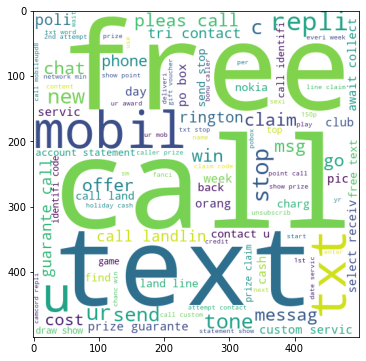

In [41]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [42]:
ham_wc = wc.generate(file[file['Target'] == 0]['transformed_email'].str.cat(sep=""))

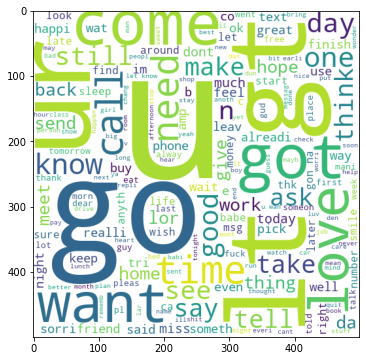

In [43]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

# Model Building

In [44]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [45]:
x = tfidf.fit_transform(file['transformed_email']).toarray()

In [46]:
x.shape

(5169, 6708)

In [47]:
y = file['Target'].values

In [48]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [52]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [53]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [59]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [60]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [61]:
prediction = rfc.predict(x_test)

In [62]:
print(prediction)
print(accuracy_score(y_test, prediction))

[0 0 0 ... 0 0 0]
0.971953578336557


In [63]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))